In [1]:
import pandas as pd

In [2]:
path='C:\\Users\dmckenzie\Desktop\K12RoomTypeClassData.csv'

In [3]:
path='C:\\Users\dmckenzie\Desktop\K12RoomTypeClassData2.csv'

In [4]:
DATIS=pd.read_csv(path)

In [5]:
DATIS[DATIS['Label2']!='outlier'].drop_duplicates(['RoomName'])

,Unnamed: 0,RoomId,RoomName,Label2
0,0,1376209350:1515093,A.V. ROOM,a.v.
3,3,207670657:2799842,A.V.,a.v.
7,7,-1008034871:8613414,A/V CLOSET,a.v.
8,8,-582555884:1330314,A/V STORAGE,a.v.
11,11,-1020528252:3998095,ACADEMIC CORRIDOR,other
...,...,...,...,...
16288,16288,1376209350:1556519,WRESTLING,other
16293,16293,-186979492:3873441,(E) WRESTLING,other
16305,16305,1709466805:1044956,Writing,other
16309,16309,-1314590706:5224835,WRK RM/COMMAND,other


In [6]:
import re
def preprocessor(text): 
    text = re.sub(r'[^\w\s]','', text)
    text = text.lower()
    return text

In [7]:
DATIS['RoomName'].apply(preprocessor)

0         av room
1         av room
2         av room
3              av
4         av room
           ...   
16312    youth rr
16313    youth rr
16314    youth rr
16315    youth rr
16316    youth rr
Name: RoomName, Length: 16317, dtype: object

In [8]:
DATIS['CleanName']=DATIS['RoomName'].str.replace('/',' ').replace({' +':' '},regex=True).apply(preprocessor)

In [9]:
DATIS['CleanName']

0         av room
1         av room
2         av room
3              av
4         av room
           ...   
16312    youth rr
16313    youth rr
16314    youth rr
16315    youth rr
16316    youth rr
Name: CleanName, Length: 16317, dtype: object

In [10]:
len(DATIS['RoomName'].value_counts())-len(DATIS['CleanName'].value_counts())

177

In [11]:
DATIS['NameLen']=DATIS['RoomName'].str.len()
DATIS['RoomName']=DATIS['RoomName'].str.lower()
DATIS['TokenCount']=((DATIS['RoomName'].str.len()-DATIS['RoomName'].str.replace(' ','').str.len())+1)

<AxesSubplot:>

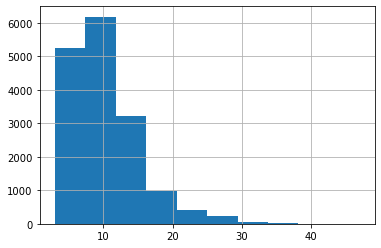

In [12]:
DATIS['NameLen'].hist()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle

In [14]:
import pandas as pd
import numpy as np
from numpy import random
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [15]:
DATIS.Label2=DATIS.Label2.str.lower()

In [16]:
DATIS['RoomName'].str.lower().str.contains('corridor').sum()

936

In [17]:
DATIS['RoomType']=np.where(DATIS['RoomName'].str.lower().str.contains('corridor'),'corridor',
         np.where(DATIS['RoomName'].str.lower().str.contains('shower'),'shower',
         np.where(DATIS['RoomName'].str.contains('|'.join([' rr','restroom','bathroom','lavartory',
                                                        'washroom','wash room','wash_room',
                                                        'tlt','toielt','bath room','rest room',
                                                        'bath_room','rest_room'])),'bathroom',
           np.where(DATIS['Label2']=='small group','other',        
          np.where(DATIS['Label2']=='special english','other',DATIS['Label2'])))))

In [18]:
DATIS['RoomType'].value_counts()

other                6725
classroom            2904
bathroom             1191
corridor              936
locker shower         774
office specialist     684
storage               660
lab                   584
science               266
mechanical            241
conference large      180
electrical            172
gym                   150
custodial             111
kitchen district      102
shower                101
principal vice         97
art exist              97
lobby vest             93
music vocal            67
library sto            61
lounge leadership      61
a.v.                   60
Name: RoomType, dtype: int64

In [19]:
DATIS.drop_duplicates(['RoomType','CleanName']).groupby(['RoomType'])['RoomType'].count()

RoomType
a.v.                   25
art exist              17
bathroom              111
classroom             213
conference large       20
corridor               23
custodial              12
electrical             13
gym                    30
kitchen district        6
lab                   139
library sto            14
lobby vest             14
locker shower          73
lounge leadership      11
mechanical             37
music vocal            22
office specialist      87
other                1318
principal vice         12
science                53
shower                 19
storage               119
Name: RoomType, dtype: int64

In [20]:
binomiallist=[]
for i in range(0,len(DATIS)):
        binomiallist.append(np.random.binomial(1, .025))

In [21]:
DATIS['Keep']=binomiallist
DATIS['Keep']=np.where(DATIS['RoomType']=='other',DATIS['Keep'],1)


In [22]:
DATIS[DATIS['RoomType']=='other']['Keep'].value_counts()

0    6560
1     165
Name: Keep, dtype: int64

In [23]:
DATIS2=DATIS[DATIS['Keep']==1]

In [24]:
DATIS2=DATIS2.drop_duplicates(['RoomType','CleanName'])

In [25]:
DATIS2

,Unnamed: 0,RoomId,RoomName,Label2,CleanName,NameLen,TokenCount,RoomType,Keep
0,0,1376209350:1515093,a.v. room,a.v.,av room,9,2,a.v.,1
3,3,207670657:2799842,a.v.,a.v.,av,4,1,a.v.,1
7,7,-1008034871:8613414,a/v closet,a.v.,a v closet,10,2,a.v.,1
8,8,-582555884:1330314,a/v storage,a.v.,a v storage,11,2,a.v.,1
11,11,-1020528252:3998095,academic corridor,other,academic corridor,17,2,corridor,1
...,...,...,...,...,...,...,...,...,...
16165,16165,1531532961:8139094,work room,other,work room,9,2,other,1
16199,16199,-689506416:11666440,workrm,other,workrm,6,1,other,1
16206,16206,-131235850:2772919,workroom,other,workroom,8,1,other,1
16283,16283,1692388767:1823721,workroom + mail + office storage,storage,workroom mail office storage,32,6,storage,1


In [26]:
y = DATIS2.RoomType.str.lower()

In [27]:
DATIS2['Name'] = DATIS2['CleanName']

In [28]:
X = DATIS2['Name']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state = 42)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [31]:

#finding

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


parameters = {
    #'tfidf__ngram_range': ((1, 1), (1, 2),(1, 3),(1,4)), 
    'tfidf__max_df': (0.25,.4 ,0.5,.6,0.75, 1.0),
    'tfidf__use_idf': (True, False),
    'tfidf__sublinear_tf': (True, False),
    'tfidf__smooth_idf' : (True, False),
    'tfidf__min_df' : (1, 2,3),
    'tfidf__norm': ('l1', 'l2'),
    #'clf__alpha': (0.00001, 0.000001,0.0001,0.001,0.01)
    #'clf__loss': ('log', 'perceptron'),
    #'clf__loss': ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'),
    #'clf__penalty': ('l2', 'elasticnet','l1')
}


pipeline = Pipeline([
               ('tfidf', TfidfVectorizer()),
               ('clf', SGDClassifier(loss='log',penalty='l1')),
              ])

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = grid_search.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


accuracy 0.9173669467787114
                   precision    recall  f1-score   support

             a.v.       0.80      0.42      0.55        19
        art exist       0.91      1.00      0.95        10
         bathroom       1.00      0.90      0.95        70
        classroom       0.94      0.97      0.95       125
 conference large       1.00      1.00      1.00        12
         corridor       0.88      1.00      0.93        14
        custodial       0.83      0.71      0.77         7
       electrical       0.86      1.00      0.92         6
              gym       0.90      1.00      0.95        18
 kitchen district       1.00      1.00      1.00         4
              lab       1.00      0.93      0.96        88
      library sto       1.00      1.00      1.00         6
       lobby vest       0.91      1.00      0.95        10
    locker shower       0.85      1.00      0.92        39
lounge leadership       1.00      0.88      0.93         8
       mechanical       1.0

In [32]:
grid_search.best_params_

{'tfidf__max_df': 0.4,
 'tfidf__min_df': 1,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': True,
 'tfidf__sublinear_tf': False,
 'tfidf__use_idf': True}

In [33]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


tfidfvec=TfidfVectorizer(ngram_range=(1,3),max_df=.25,min_df=1,norm='l2',smooth_idf=True,sublinear_tf=False,use_idf=True)
mod=SGDClassifier(penalty='l1',loss='log',alpha=0.00001)

#vectorizer.fit(X_train)
#X_train2=vectorizer.transform(X_train)
#X_test2=vectorizer.transform(X_test)




text_clf = Pipeline([ 
    ('tfidf', tfidfvec),
    ('clf', mod),
])


text_clf.fit(X_train, y_train)

#mod.fit(X_train2, y_train)

from sklearn.metrics import classification_report
#y_pred = mod.predict(X_test2)
y_pred2 = text_clf.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred2, y_test))
print(classification_report(y_test, y_pred2))


#print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred))

accuracy 0.9103641456582633
                   precision    recall  f1-score   support

             a.v.       0.83      0.53      0.65        19
        art exist       0.91      1.00      0.95        10
         bathroom       0.97      0.90      0.93        70
        classroom       0.94      0.96      0.95       125
 conference large       0.92      1.00      0.96        12
         corridor       0.88      1.00      0.93        14
        custodial       1.00      0.86      0.92         7
       electrical       0.86      1.00      0.92         6
              gym       0.90      1.00      0.95        18
 kitchen district       0.80      1.00      0.89         4
              lab       0.93      0.93      0.93        88
      library sto       0.86      1.00      0.92         6
       lobby vest       0.91      1.00      0.95        10
    locker shower       0.85      1.00      0.92        39
lounge leadership       1.00      1.00      1.00         8
       mechanical       0.9

In [34]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import StringTensorType
from onnxmltools import save_model
from onnxruntime import InferenceSession

In [35]:
onnx_model = convert_sklearn(text_clf,
name='RoomTypeClassifier',
initial_types=[('input', StringTensorType([1, 1]))]
)

save_model(onnx_model, 'RoomClass.onnx')
sess = InferenceSession("RoomClass.onnx")
label_name = sess.get_outputs()[0].name
input_name = sess.get_inputs()[0].name

res = sess.run(None, input_feed={'input': np.array([['corridor']])})

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\skl2onnx\operator_converters\text_vectoriser.py:185: UserWarning: Converter for TfidfVectorizer will use scikit-learn regular expression by default in version 1.6.
  UserWarning)
C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\skl2onnx\common\_container.py:595: UserWarning: Unable to find operator 'Tokenizer' in domain 'com.microsoft' in ONNX, op_version is forced to 1.
  op_type, domain))


NameError: name 'sess' is not defined

In [115]:
res

[array(['corridor'], dtype=object),
 [{'a.v.': 0.0005470490432344377,
   'art exist': 9.61030600592494e-05,
   'bathroom': 0.00018557437579147518,
   'classroom': 0.0002550547069404274,
   'conference large': 0.0008631146629340947,
   'corridor': 0.9907276630401611,
   'custodial': 0.0006747011211700737,
   'electrical': 0.00015836229431442916,
   'gym': 0.0010776950512081385,
   'kitchen district': 0.0007900006021372974,
   'lab': 0.0002391795424045995,
   'library sto': 0.00027800322277471423,
   'lobby vest': 0.0005601845914497972,
   'locker shower': 0.0007997159264050424,
   'lounge leadership': 0.0004221965791657567,
   'mechanical': 0.0003763679414987564,
   'music vocal': 9.92583081824705e-05,
   'office specialist': 0.0002946862077806145,
   'other': 3.795786824412062e-06,
   'principal vice': 0.00038096358184702694,
   'science': 2.462184420437552e-05,
   'shower': 0.000591575400903821,
   'storage': 0.0005541396676562726}]]

In [43]:
with open("TextClassifier1.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [42]:
res

[array(['services1'], dtype=object),
 [{'amenity': 0.07348394393920898,
   'circulation': 0.044751111418008804,
   'collaboration: closed': 0.07773763686418533,
   'collaboration: open': 0.04349435120820999,
   'desking: open workstation': 0.031024377793073654,
   'desking: private office': 0.049801651388406754,
   'lab': 0.04049787297844887,
   'services 2': 0.039142508059740067,
   'services1': 0.4987942576408386,
   'support': 0.10127229988574982}]]

In [336]:
import pickle

In [337]:
pickle.dump(vectorizer, open('C:\\Users\dmckenzie\documents\\roomvectorizer.pickle', "wb"))

In [338]:
pickle.dump(mod, open('C:\\Users\dmckenzie\documents\\roommodel.pickle', "wb"))

In [68]:
len(y_pred)
len(X_test)

4948

In [79]:
matchdf=pd.DataFrame({'A':list(y_pred2[X_test.isin(list(X_train))==False]),
              'B':list(y_test[X_test.isin(list(X_train))==False])})

In [80]:
matchdf['C']=(matchdf['A']==matchdf['B'])*1

In [81]:
matchdf['D']=1

In [82]:
labels=list(matchdf.groupby(['A'])['D'].sum().index)

In [83]:
scores=list(matchdf.groupby(['A'])['C'].sum().values/matchdf.groupby(['A'])['D'].sum().values)

In [84]:
print('Accuracy:',matchdf['C'].sum()/matchdf['D'].sum())

Accuracy: 0.8950617283950617


In [85]:
pd.DataFrame({'Category':labels,'Guesses':list(matchdf.groupby(['A'])['D'].sum().values),'True Positive Rate':scores})

,Category,Guesses,True Positive Rate
0,art digital exist,10,0.600000
1,bathroom,32,0.843750
2,classroom,83,0.879518
3,collaboration student work,4,1.000000
4,common social collaboration,11,0.636364
5,conference resource collaboration,6,0.833333
6,corridor mail central,3,0.666667
7,lab exist flex,23,0.782609
8,locker athletic official,13,1.000000
9,mechanical yard auditorium,5,0.800000


C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 728, in fit
    sample_weight=sample_weight)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 541, in _fit
    accept_large_sparse=False)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\dmckenzie\Anaconda3\e

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 728, in fit
    sample_weight=sample_weight)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 541, in _fit
    accept_large_sparse=False)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\dmckenzie\Anaconda3\e

<AxesSubplot:title={'center':'Classifier Validation Score As Training Data Grows'}, xlabel='Training Data Size', ylabel='Validation Score'>

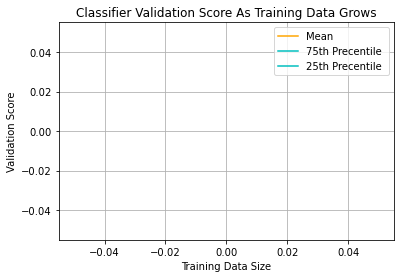

In [39]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

#np.random.seed(0)
#X, y = load_iris(return_X_y=True)
#indices = np.arange(y.shape[0])
#np.random.shuffle(indices)
#X, y = X[indices], y[indices]

train_sizes, train_scores, valid_scores = learning_curve(SGDClassifier(penalty='l1',loss='log',alpha=0.00001),
                                                         X_train, y_train, train_sizes=[10,20,30,40,50,60,70,80,90,100,
                                                                                         110,120,130,140,150,160,170,180,190,200,
                                                                                         210,220,230,240,250,260,270,280,290,300,
                                                                                         310,320,330,340,350,360,370,380,390,400,
                                                                                        410,420,430],cv=5)
pd.DataFrame({'Mean':list(pd.DataFrame(valid_scores.transpose()).median()),
             '75th Precentile ':list(pd.DataFrame(valid_scores.transpose()).quantile(0.75)),
             '25th Precentile':list(pd.DataFrame(valid_scores.transpose()).quantile(0.25))},
             index=train_sizes).plot(color = ['orange', 'c','c'],
                                    xlabel='Training Data Size',ylabel='Validation Score',
                                     grid=True,title='Classifier Validation Score As Training Data Grows')

In [37]:
pd.DataFrame(valid_scores.transpose()).mean().plot()

NameError: name 'valid_scores' is not defined

In [38]:
pd.DataFrame(pd.DataFrame(valid_scores.transpose())).plot()

NameError: name 'valid_scores' is not defined